In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
import dill
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib import rc
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from ipywidgets import *
from IPython.display import display
from IPython.display import clear_output


font = {'color':  'black',
        'weight': 'normal',
        'size': 10,
        'style': 'italic'
        }

matplotlib.rcParams.update({'font.family': 'sans-serif','font.sans-serif': 'Arial', 'mathtext.fontset': 'stix',
                           'font.size':'12'})
matplotlib.rcParams['axes.linewidth'] = 1.3
formatter = ticker.ScalarFormatter(useMathText=True)

In [2]:
body = pd.read_csv('ee_or_matched.csv', dtype=str, usecols=['title',
                                                            'exec_dt',
                                                            'convey_text',
                                                            'grant_doc_num',
                                                            'ticker',
                                                            'or_name_matched'])

In [3]:
year = [str(date).split('-', 1)[0] for date in body['exec_dt']]
body['exec_dt'] = year

In [5]:
ticker_from_patent = list(set(body['ticker']))

In [6]:
# update data sources:
company_info = pd.read_csv('companytickers.csv')

In [7]:
company_info_use = company_info[company_info['Ticker'].isin(ticker_from_patent)]
company_info_use = company_info_use.rename(columns={'Ticker':'ticker'})

In [8]:
historydata = body.merge(company_info_use, on='ticker')
sector_yearly = historydata.groupby(['exec_dt','Sector']).count()
sector_yearly_unpack = pd.DataFrame(sector_yearly.to_records())
sectors = list(set(sector_yearly_unpack['Sector']))

In [77]:
dropdown = widgets.Dropdown(options=sectors, description='Sectors')
display(dropdown)

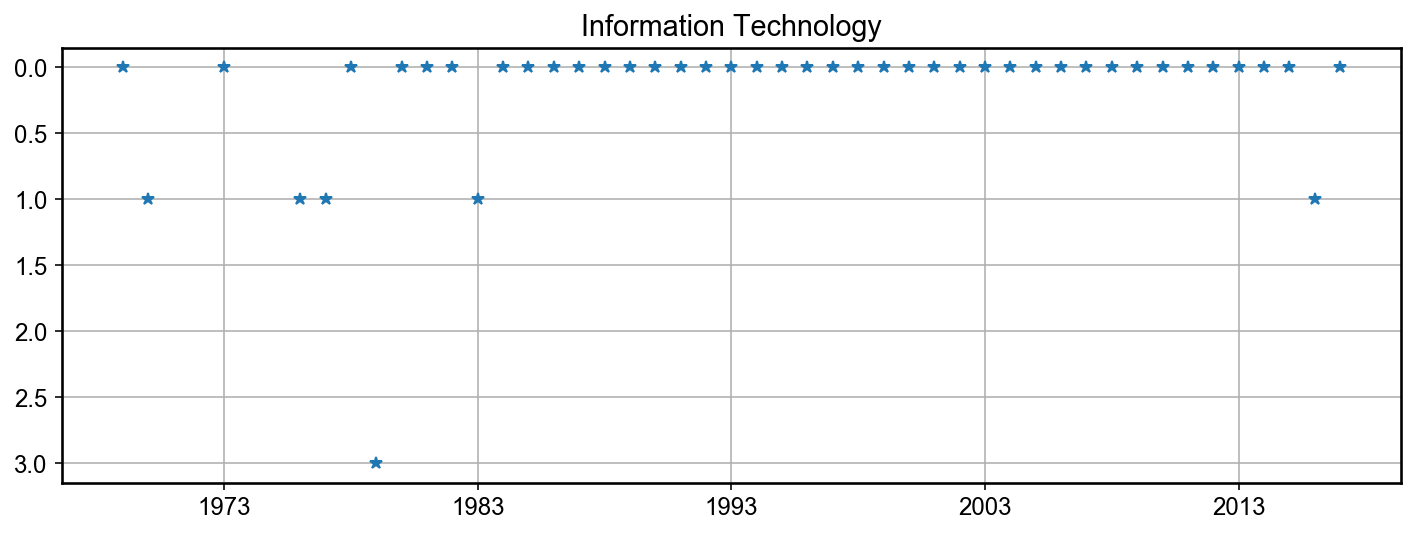

In [102]:
yearlist = sorted(list(set(sector_yearly_unpack['exec_dt'])))
test = []
for year in yearlist:
    test.append(sector_yearly_unpack[sector_yearly_unpack['exec_dt']==year])
    
rank = []    
for i in range(len(test)):    
    test_year = test[i][['exec_dt','Sector','grant_doc_num']].sort_values(by='grant_doc_num', ascending=False)
    test_year = test_year.reset_index(drop=True)
    rank.append(test_year)
    
sector = []
target = dropdown.value
for i in range(len(rank)):
    df = rank[i]
    if df[df['Sector'] == target].empty is False:
        sector.append(df[df['Sector'] == target].reset_index())
        
ranking = []
for i in sector:
    if list(i['exec_dt'])[0] != 'nan':
        ranking.append((np.datetime64(list(i['exec_dt'])[0]), list(i['index'])[0]))
        
rankingdf = pd.DataFrame(data=ranking)
rankingdf.columns = ['year','ranking']
plt.figure(figsize=(12,4))
plt.plot_date(rankingdf['year'], rankingdf['ranking'], '*')
plt.title(target)
plt.grid()
# plt.xticks(np.arange(min(rankingdf['year']), max(rankingdf['year'])+1, 1.0))
ax = plt.gca()
ax.invert_yaxis()